
##  Lending Club 




### Sections     

 - <a href='#Sampling'>1. Loading small samples the datasets</a><br>  
 - <a href='#Format columns'>2. Preliminary column formatting </a><br>   
    




<p><a name="Sampling"></a></p> 

### 1. Loading small samples of the dataset   


In [2]:

import numpy as np     
import pandas as pd  
import gzip  
import csv
import random   
import matplotlib.pyplot as plt     
from pandas.plotting import scatter_matrix
import seaborn as sns   

from sklearn.pipeline import Pipeline   
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import KFold  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV    
from sklearn.model_selection import RandomizedSearchCV  

from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge   
from sklearn.linear_model import ElasticNet 

from sklearn.tree import DecisionTreeRegressor    
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR   
from sklearn.ensemble import RandomForestRegressor  
from sklearn.ensemble import GradientBoostingRegressor   
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor    
from xgboost import XGBRegressor  
from sklearn import metrics   
from sklearn.metrics import mean_squared_error  

pd.set_option('display.max_columns', 900)   
pd.set_option('display.max_rows', 900)

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'   



In [3]:
''' Sampling from the accepted dataset '''

n = 2800000   # number of rows in the dataset      
s = int(n * 0.0001)  # sample size of 0.01% 

skip = sorted(random.sample(range(1, n + 1), n - s))  # random sampling  
df_accepted = pd.read_csv('datasets_902_370089_accepted_2007_to_2018Q4.csv.gz', 
                          compression = 'gzip', error_bad_lines = False, 
                          parse_dates = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], 
                          infer_datetime_format = True, 
                          skiprows = skip,  
                          low_memory = False)   

df_accepted.head(5)   



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68282763,NaN,3650.0,3650.0,3650.0,36 months,13.44,123.76,C,C3,Accouts Payable,3 years,MORTGAGE,70000.0,Source Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,488xx,MI,13.80,0.0,2007-01-01,700.0,704.0,0.0,NaN,NaN,19.0,0.0,27666.0,75.2,31.0,w,0.00,0.00,4250.640000,4250.64,3650.00,600.64,0.0,0.0,0.0,2017-08-01,0.82,NaN,2019-03-01,639.0,635.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,122472.0,0.0,10.0,0.0,0.0,27.0,31556.0,81.0,1.0,3.0,8768.0,78.0,36800.0,0.0,0.0,3.0,3.0,6446.0,625.0,96.0,0.0,0.0,107.0,62.0,12.0,12.0,3.0,12.0,NaN,5.0,NaN,0.0,3.0,7.0,3.0,3.0,20.0,8.0,8.0,7.0,19.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,146083.0,59222.0,15500.0,38757.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,66546550,NaN,9000.0,9000.0,9000.0,36 months,12.59,301.48,C,C2,Mine Foreman,10+ years,OWN,120000.0,Source Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,242xx,VA,15.12,2.0,2005-10-01,700.0,704.0,0.0,23.0,NaN,10.0,0.0,4087.0,36.5,18.0,f,0.00,0.00,9090.990000,9090.99,9000.00,90.99,0.0,0.0,0.0,2016-02-01,9106.73,NaN,2016-02-01,654.0,650.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,50337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11200.0,NaN,NaN,NaN,8.0,5034.0,7113.0,36.5,0.0,0.0,116.0,112.0,6.0,6.0,1.0,6.0,23.0,13.0,23.0,1.0,5.0,5.0,5.0,6.0,11.0,5.0,6.0,5.0,10.0,0.0,0.0,0.0,2.0,77.8,40.0,0.0,0.0,80259.0,50337.0,11200.0,69059.0,NaN,NaN,NaN,NaN,Na

In [ ]:
 ''' Sampling from the rejected dataset '''   

# n = 28000000   # number of rows in the dataset      
# s = int(n * 0.0001)  # sample size of 0.01% 

# skip = sorted(random.sample(range(1, n + 1), n - s))  # random sampling  
# df_rejected = pd.read_csv('datasets_902_370089_rejected_2007_to_2018Q4.csv.gz', 
#                           compression = 'gzip', error_bad_lines = False, 
#                           parse_dates = ['Application Date'], 
#                           infer_datetime_format = True, 
#                           skiprows = skip)

# df_rejected.head(5)   


In [4]:

print(f'the shape of df_accepted: {df_accepted.shape}', '\n')  
#print(f'the shape of df_rejected: {df_rejected.shape}')    


the shape of df_accepted: (234, 151) 



In [5]:

df_accepted.describe().transpose()    


,count,mean,std,min,25%,50%,75%,max
id,234.0,8.462328e+07,4.365110e+07,420464.00,5.397717e+07,8.797573e+07,1.261812e+08,1.452769e+08
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,234.0,1.509402e+04,8.742247e+03,1675.00,8.575000e+03,1.400000e+04,2.000000e+04,4.000000e+04
funded_amnt,234.0,1.509402e+04,8.742247e+03,1675.00,8.575000e+03,1.400000e+04,2.000000e+04,4.000000e+04
funded_amnt_inv,234.0,1.507329e+04,8.760228e+03,1675.00,8.575000e+03,1.400000e+04,2.000000e+04,4.000000e+04
int_rate,234.0,1.266709e+01,4.875708e+00,5.31,8.727500e+00,1.189500e+01,1.561000e+01,3.049000e+01
installment,234.0,4.458286e+02,2.634192e+02,58.70,2.591575e+02,3.996100e+02,5.779200e+02,1.331060e+03
annual_inc,234.0,7.097215e+04,3.927336e+04,0.00,4.500000e+04,6.250000e+04,8.975000e+04,2.144000e+05
dti,233.0,1.968558e+01,1.067749e+01,0.00,1.296000e+01,1.872000e+01,2.595000e+01,7.281000e+01
delinq_2yrs,234.0,3.376068e-01,1.139100e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00


In [6]:
''' columns of df_accepted '''

# df_accepted.columns.tolist()    

df_accepted.info(verbose = True)  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 151 columns):
 #   Column                                      Dtype         
---  ------                                      -----         
 0   id                                          int64         
 1   member_id                                   float64       
 2   loan_amnt                                   float64       
 3   funded_amnt                                 float64       
 4   funded_amnt_inv                             float64       
 5   term                                        object        
 6   int_rate                                    float64       
 7   installment                                 float64       
 8   grade                                       object        
 9   sub_grade                                   object        
 10  emp_title                                   object        
 11  emp_length                                  object       

In [ ]:
''' columns of df_rejected '''

#df_rejected.columns.tolist()    


In [ ]:

df_accepted.info(verbose = True)     



In [ ]:

#df_rejected.info()   



In [ ]:
''' column headings '''

# df_accepted.columns = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 
#                        'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 
#                        'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 
#                        'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 
#                        'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 
#                        'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
#                        'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
#                        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
#                        'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 
#                        'last_credit_pull_d',  'last_fico_range_high', 'last_fico_range_low', 
#                        'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 
#                        'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 
#                        'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 
#                        'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 
#                        'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 
#                        'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 
#                        'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
#                        'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 
#                        'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 
#                        'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',  
#                        'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
#                        'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 
#                        'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 
#                        'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 
#                        'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 
#                        'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 
#                        'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 
#                        'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type', 'hardship_reason', 
#                        'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 
#                        'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 
#                        'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 
#                        'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 
#                        'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 
#                        'settlement_percentage', 'settlement_term']


# df_rejected.columns = ['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score', 
#                        'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length', 'Risk Policy']  





<p><a name="Format columns"></a></p> 

### 2. Preliminary column deletion and formatting   


In [4]:
''' df_accepted: drop columns (part 1) '''

df_accepted = df_accepted.drop(['id', 'member_id', 'sub_grade', 'url', 'desc', 'title', 'last_fico_range_high', 
                                'last_fico_range_low'], axis = 1)


# create a new column for loan issued year 
df_accepted['issued_yr'] = (pd.DatetimeIndex(df_accepted['issue_d']).year).astype('int32')     

# create a new column for the average FICO score 
df_accepted['Avg FICO'] = (0.5 * (df_accepted['fico_range_low'] + df_accepted['fico_range_high'])).astype('int32')  
df_accepted = df_accepted.drop(['fico_range_low', 'fico_range_high'], axis = 1)   # drop the old FICO feature columns 

# drop the word 'months' in the 'term' feature column      
def drop_term(a):  
    return float(a.replace('months', ''))   
df_accepted['term'] = (df_accepted['term'].apply(drop_term)).astype('int32') 

# create a numerical 'grade' feature column 


df_accepted.head()  


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issued_yr,Avg FICO
0,5600.0,5600.0,5600.0,36,9.17,178.53,B,Business Coordinator III,8 years,RENT,48000.0,Source Verified,2015-12-01,Fully Paid,n,credit_card,TX,19.85,0.0,1995-07-01,0.0,26.0,NaN,8.0,0.0,12503.0,64.8,68.0,w,0.0,0.0,6067.393708,6067.39,5600.00,467.39,0.0,0.00,0.0000,2017-02-01,3930.74,NaN,2019-03-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,21160.0,0.0,1.0,0.0,6.0,13.0,8657.0,72.0,1.0,2.0,8479.0,68.0,19300.0,0.0,0.0,0.0,8.0,2645.0,5467.0,67.1,0.0,0.0,122.0,245.0,12.0,12.0,1.0,12.0,26.0,NaN,26.0,0.0,5.0,6.0,5.0,6.0,59.0,7.0,8.0,6.0,8.0,0.0,0.0,0.0,1.0,95.5,40.0,0.0,0.0,31300.0,21160.0,16600.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,662
1,15000.0,15000.0,15000.0,36,6.99,463.09,A,Purchasing Manager,2 years,MORTGAGE,93000.0,Not Verified,2015-12-01,Fully Paid,n,credit_card,MA,14.86,0.0,1993-10-01,1.0,NaN,NaN,8.0,0.0,14914.0,43.2,17.0,w,0.0,0.0,16162.618727,16162.62,15000.00,1162.62,0.0,0.00,0.0000,2017-05-01,8796.87,NaN,2017-06-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,306430.0,1.0,2.0,1.0,1.0,2.0,50591.0,41.0,1.0,1.0,4286.0,43.0,34500.0,3.0,0.0,6.0,3.0,38304.0,12608.0,42.7,0.0,0.0,266.0,208.0,8.0,2.0,1.0,8.0,NaN,2.0,NaN,0.0,4.0,5.0,4.0,4.0,9.0,5.0,7.0,5.0,8.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,340542.0,65505.0,22000.0,58692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,757
2,18200.0,18200.0,18200.0,60,15.77,440.37,D,Accounting Supervisor,8 years,RENT,65000.0,Not Verified,2015-12-01,Charged Off,n,credit_card,GA,29.28,0.0,2004-02-01,1.0,NaN,46.

In [5]:
''' df_accepted: drop columns (part 2) '''

df_accepted = df_accepted.drop(['revol_bal_joint', 'sec_app_fico_range_low', 
                                'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 
                                'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 
                                'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 
                                'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 
                                'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 
                                'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 
                                'hardship_length', 'hardship_dpd', 'hardship_loan_status', 
                                'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 
                                'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 
                                'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 
                                'settlement_percentage', 'settlement_term'], 
                               axis = 1)  

# df_accepted.head()  


In [ ]:
df_accepted.shape 

In [6]:
''' df_accepted: drop columns (part 3) '''
''' create a smaller df_accepted data frame (for info only) '''

df_accepted = df_accepted.drop(['mths_since_last_record', 'annual_inc_joint', 'dti_joint'], 
                               axis = 1)
df_accepted.head()  


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issued_yr,Avg FICO
0,5600.0,5600.0,5600.0,36,9.17,178.53,B,Business Coordinator III,8 years,RENT,48000.0,Source Verified,2015-12-01,Fully Paid,n,credit_card,TX,19.85,0.0,1995-07-01,0.0,26.0,8.0,0.0,12503.0,64.8,68.0,w,0.0,0.0,6067.393708,6067.39,5600.00,467.39,0.0,0.00,0.0000,2017-02-01,3930.74,NaN,2019-03-01,0.0,NaN,1.0,Individual,NaN,0.0,0.0,21160.0,0.0,1.0,0.0,6.0,13.0,8657.0,72.0,1.0,2.0,8479.0,68.0,19300.0,0.0,0.0,0.0,8.0,2645.0,5467.0,67.1,0.0,0.0,122.0,245.0,12.0,12.0,1.0,12.0,26.0,NaN,26.0,0.0,5.0,6.0,5.0,6.0,59.0,7.0,8.0,6.0,8.0,0.0,0.0,0.0,1.0,95.5,40.0,0.0,0.0,31300.0,21160.0,16600.0,12000.0,2015,662
1,15000.0,15000.0,15000.0,36,6.99,463.09,A,Purchasing Manager,2 years,MORTGAGE,93000.0,Not Verified,2015-12-01,Fully Paid,n,credit_card,MA,14.86,0.0,1993-10-01,1.0,NaN,8.0,0.0,14914.0,43.2,17.0,w,0.0,0.0,16162.618727,16162.62,15000.00,1162.62,0.0,0.00,0.0000,2017-05-01,8796.87,NaN,2017-06-01,0.0,NaN,1.0,Individual,NaN,0.0,0.0,306430.0,1.0,2.0,1.0,1.0,2.0,50591.0,41.0,1.0,1.0,4286.0,43.0,34500.0,3.0,0.0,6.0,3.0,38304.0,12608.0,42.7,0.0,0.0,266.0,208.0,8.0,2.0,1.0,8.0,NaN,2.0,NaN,0.0,4.0,5.0,4.0,4.0,9.0,5.0,7.0,5.0,8.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,340542.0,65505.0,22000.0,58692.0,2015,757
2,18200.0,18200.0,18200.0,60,15.77,440.37,D,Accounting Supervisor,8 years,RENT,65000.0,Not Verified,2015-12-01,Charged Off,n,credit_card,GA,29.28,0.0,2004-02-01,1.0,NaN,27.0,1.0,7411.0,59.8,38.0,w,0.0,0.0,4832.530000,4832.53,1465.09,1617.50,0.0,1749.94,314.9892,2016-08-01,440.37,NaN,2017-02-01,1.0,NaN,1.0,Individual,NaN,0.0,2403.0,113674.0,3.0,19.0,2.0,5.0,2.0,106263.0,97.0,2.0,6.0,2580.0,93.0,12400.0,6.0,0.0,2.0,11.0,4210.0,444.0,87.7,0.0,0.0,142.0,127.0,0.0,0.0,2.0,28.0,NaN,5.0,NaN,0.0,2.0,6.0,2.0,2.0,27.0,8.0,9.0,6.0,27.0,0.0,0.0,0.0,4.0,100.0,50.0,1.0,0.0,121798.0,113674.0,3600.0,109398.0,2015,662
3,34000.0,34000.0,34000.0,36,10.78,1109.58,B,Clinical Documentation Specialist,7 years,RENT,76497.0,Verified,2015-12-01,Fully Paid,n,debt_consolidation,NV,13.32,0.0,1995-09-01,0.0,NaN,4.0,0.0,34886.0,96.9,7.0,w,0.0,0.0,39686.531188,39686.53,34000.00,5686.53,0.0,0.00,0.0000,2018-07-01,6541.67,NaN,2018-08-01,0.0,NaN,1.0,Individual,NaN,0.0,0.0,34886.0,0.0,0.0,0.0,0.0,82.0,0.0,NaN,0.0,0.0,17577.0,97.0,36000.0,0.0,0.0,0.0,0.0,11629.0,1114.0,96.9,0.0,0.0,134.0,243.0,110.0,82.0,0.0,110.0,NaN,NaN,NaN,0.0,3.0,3.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,36000.0,34886.0,36000.0,0.0,2015,707
4,3600.0,3600.0,3600.0,36,7.49,111.97,A,Accounts Receivable Manager,< 1 year,MOR

In [ ]:

df_accepted.shape   


[]

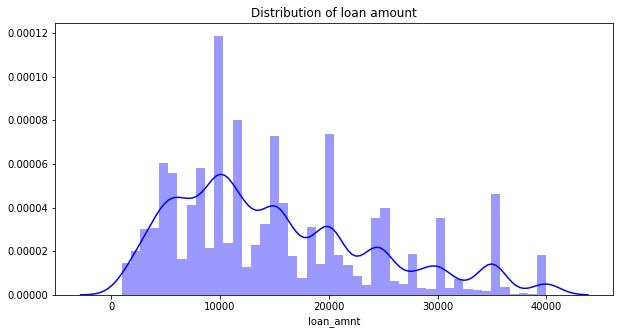

In [7]:
''' histogram of funded amount  '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_accepted['loan_amnt'], color = 'blue')  
plt.title('Distribution of loan amount')   

plt.plot()   


[]

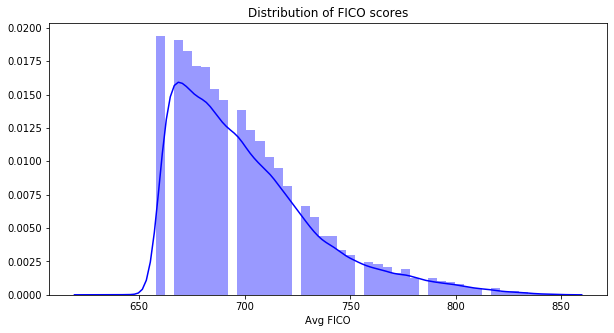

In [8]:
''' histogram of FICO score   '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_accepted['Avg FICO'], color = 'blue')     
plt.title('Distribution of FICO scores')   

plt.plot() 

[]

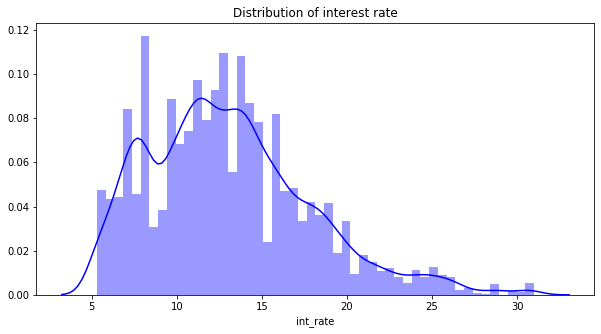

In [9]:
''' histogram of interest rate   '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_accepted['int_rate'], color = 'blue')     
plt.title('Distribution of interest rate')   

plt.plot() 



In [11]:
''' value count of loan purpose '''     

df_accepted['purpose'].value_counts(ascending = True, dropna = False) 


educational               5
renewable_energy         13
wedding                  22
house                   137
moving                  160
vacation                161
car                     242
small_business          264
medical                 283
major_purchase          482
other                  1419
home_improvement       1528
credit_card            5233
debt_consolidation    12625
Name: purpose, dtype: int64

In [12]:
''' value count of loan purpose (percentage) '''     

100 * df_accepted['purpose'].value_counts(ascending = True, dropna = False) / len(df_accepted)

educational            0.022149
renewable_energy       0.057588
wedding                0.097457
house                  0.606893
moving                 0.708780
vacation               0.713210
car                    1.072030
small_business         1.169487
medical                1.253655
major_purchase         2.135200
other                  6.285993
home_improvement       6.768849
credit_card           23.181536
debt_consolidation    55.927173
Name: purpose, dtype: float64

In [13]:
''' value count of loan GRADE  '''

df_accepted['grade'].value_counts(ascending = True, dropna = False)    


G     103
F     427
E    1365
D    3271
A    4279
C    6439
B    6690
Name: grade, dtype: int64

In [14]:
''' Median FICO scores and grade => info for box plot '''   

df_accepted.groupby('grade')['Avg FICO'].median().sort_values(ascending = False)   


grade
A    727
B    697
C    687
G    682
D    682
F    677
E    677
Name: Avg FICO, dtype: int32

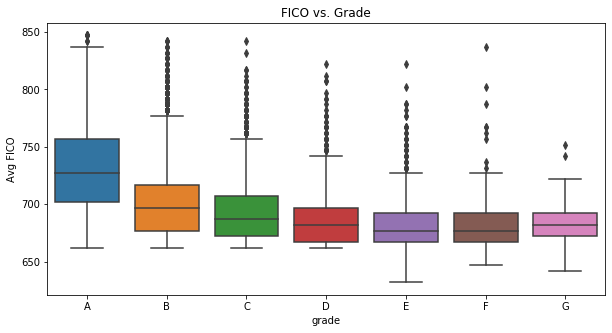

In [15]:
''' Boxplot of FICO scores '''   

plt.figure(figsize = (10, 5)) 
ax = sns.boxplot(x = 'grade', y = 'Avg FICO', data = df_accepted, order = ['A', 'B', 'C', 'D',
                                                                          'E', 'F', 'G']) 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)  
plt.title('FICO vs. Grade')

plt.show()      


In [7]:
''' Median DTI and grade => info for box plot '''   

df_accepted.groupby('grade')['dti'].median().sort_values(ascending = False)   



grade
E    23.560
F    22.210
C    20.110
D    20.095
A    17.555
B    16.930
Name: dti, dtype: float64

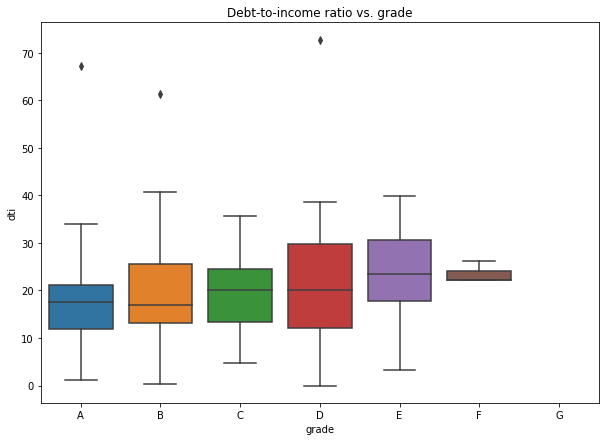

In [9]:
''' Boxplot of FICO scores '''   

plt.figure(figsize = (10, 7)) 
ax = sns.boxplot(x = 'grade', y = 'dti', data = df_accepted, order = ['A', 'B', 'C', 'D', 
                                                                      'E', 'F', 'G']) 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)  
plt.title('Debt-to-income ratio vs. grade')

plt.show()      



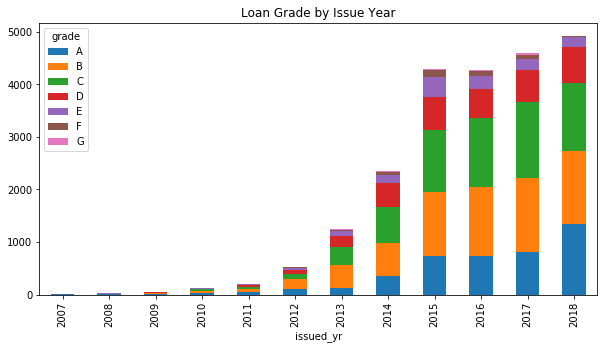

In [20]:
''' Plot of loan grade by year '''

df2 = df_accepted.groupby(['issued_yr','grade'])['grade'].count().unstack('grade')#.fillna(0)
df2.plot(kind = 'bar', stacked = True, figsize = (10, 5))   
plt.title('Loan Grade by Issue Year')

plt.show() 


In [21]:
''' interest rate by issued year and grade '''   

df_accepted.groupby(['issued_yr', 'grade', 'term'])[['int_rate']].median() 




int_rate
issued_yr grade term          
2007      A     36       7.430
          B     36       8.700
          C     36      11.220
          D     36      13.120
          E     36      14.380
          F     36      15.330
          G     36      17.220
2008      A     36       7.680
          B     36      10.080
          C     36      11.535
          D     36      13.235
          E     36      15.070
          F     36      16.150
          G     36      17.975
2009      A     36       7.740
          B     36      11.830
          C     36      13.160
          D     36      15.310
          E     36      16.510
          F     36      18.090
2010      A     36       7.325
                60       7.210
          B     36      10.990
                60      11.490
          C     36      13.350
                60      13.420
          D     36      15.200
                60      15.765
          E     36      15.950
                60      16.755
          F     60      19.225
2011      A     36       6.620
                60       7.490
          B     36      10.740
                60      11.110
          C     36      13.895
                60      13.490
          D     36      16.290
                60      16.005
          E     36      18.710
                60      18.790
          F     60      20.435
2012      A     36       7.900
                60       8.900
          B     36      12.120
                60      12.120
          C     36      15.310
                60      15.310
          D     36      18.490
                60      18.490
          E     36      20.500
                60      20.745
          F     60      22.950
          G     60      24.890
2013      A     36       7.900
                60       8.900
          B     36      11.550
                60      12.120
          C     36      15.310
                60      15.840
          D     36      18.750
                60      19.200
          E     36      21.150
                60      21.700
          F     36      23.700
                60      23.795
          G     60      25.800
2014      A     36       7.490
                60       8.390
          B     36      10.990
                60      11.670
          C     36      13.980
                60      14.490
          D     36      16.990
                60      16.990
          E     36      20.200
                60      20.490
          F     36      24.080
                60      24.500
          G     36      25.815
                60      25.830
2015      A     36       6.920
                60       7.890
          B     36       9.990
                60       9.990
          C     36      13.180
                60      13.330
          D     36      16.550
                60      16.990
          E     36      18.550
                60      18.990
          F     36      22.990
                60      23.990
          G     36      26.770
                60      26.415
2016      A     36       6.990
                60       7.890
          B     36      10.490
                60      10.490
          C     36      13.670
                60      13.990
          D     36      17.990
                60      18.990
          E     36      22.390
                60      22.390
          F     36      25.320
                60      25.100
          G     36      28.180
                60      28.180
2017      A     36       7.210
                60       7.970
          B     36      10.910
                60      10.420
          C     36      14.080
                60      14.080
          D     36      18.060
                60      18.990
          E     36      23.990
                60      25.490
          F     36      30.170
                60      29.490
          G     36      30.890
                60      30.840
2018      A     36       7.210
                60       7.460
          B     36      10.720
                60      10.720
          C     36     

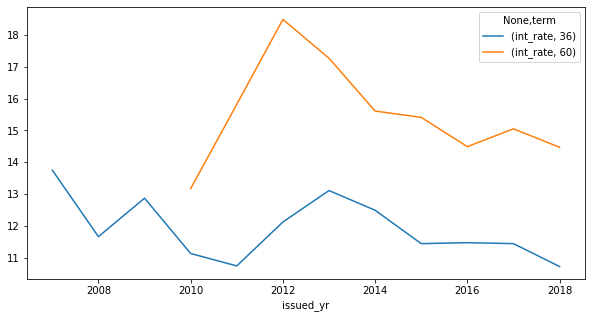

In [22]:

# plot data
fig, ax = plt.subplots(figsize = (10,5))

# use unstack()
df_accepted.groupby(['issued_yr', 'term'])[['int_rate']].median().unstack().plot(ax = ax)    



In [11]:
''' Loan status breakdown '''

df_accepted['loan_status'].value_counts(ascending = True, dropna = False)   


Late (31-120 days)      1
In Grace Period         1
Charged Off            25
Current                95
Fully Paid            112
Name: loan_status, dtype: int64

In [10]:
''' value count of loan status (percentage) '''     

100 * df_accepted['loan_status'].value_counts(ascending = True, dropna = False) / len(df_accepted)



Late (31-120 days)     0.427350
In Grace Period        0.427350
Charged Off           10.683761
Current               40.598291
Fully Paid            47.863248
Name: loan_status, dtype: float64

In [27]:

df_accepted.groupby(['issued_yr', 'loan_status'])[['loan_status']].count()    



loan_status
issued_yr loan_status                                                    
2007      Does not meet the credit policy. Status:Charged...            3
          Does not meet the credit policy. Status:Fully Paid            4
          Fully Paid                                                    1
2008      Does not meet the credit policy. Status:Charged...            3
          Does not meet the credit policy. Status:Fully Paid            7
          Fully Paid                                                   15
2009      Charged Off                                                   4
          Does not meet the credit policy. Status:Fully Paid            1
          Fully Paid                                                   43
2010      Charged Off                                                  19
          Does not meet the credit policy. Status:Charged...            2
          Does not meet the credit policy. Status:Fully Paid            6
          Fully Paid                                                   95
2011      Charged Off                                                  27
          Fully Paid                                                  176
2012      Charged Off                                                  70
          Fully Paid                                                  450
2013      Charged Off                                                 202
          Fully Paid                                                 1035
2014      Charged Off                                                 409
          Current                                                     119
          Fully Paid                                                 1819
          In Grace Period                                               1
          Late (31-120 days)                                            5
2015      Charged Off                                                 783
          Current                                                     434
          Fully Paid                                                 3046
          In Grace Period                                               6
          Late (16-30 days)                                             5
          Late (31-120 days)                                           13
2016      Charged Off                                                 666
          Current                                                    1327
          Fully Paid                                                 2197
          In Grace Period                                              17
          Late (16-30 days)                                            14
          Late (31-120 days)                                           42
2017      Charged Off                                                 416
          Current                                                    2666
          Fully Paid                                                 1369
          In Grace Period                                              31
          Late (16-30 days)                                            24
          Late (31-120 days)                                           80
2018      Charged Off                                                  85
          Current                                                    4223
          Default                                                       1
          Fully Paid                                                  489
          In Grace Period                                              42
          Late (16-30 days)                                            19
          Late (31-120 days)                                           63

##     
##  ********************     

### information provided by Lending Club 

####  https://www.lendingclub.com/info/demand-and-credit-profile.action   


##  ********************     




###  =====> Characteristics of charged-off / default loans <===========    

####  ***** Value count of LOAN STATUS *****

In [28]:
''' value count of LOAN STATUS: raw value  '''     

print('value count of Loan Status (raw values)', '\n') 
df_accepted['loan_status'].value_counts(ascending = True, dropna = False)   


value count of Loan Status (raw values) 



Default                                                    1
Does not meet the credit policy. Status:Charged Off        8
Does not meet the credit policy. Status:Fully Paid        18
Late (16-30 days)                                         62
In Grace Period                                           97
Late (31-120 days)                                       203
Charged Off                                             2681
Current                                                 8769
Fully Paid                                             10735
Name: loan_status, dtype: int64

In [29]:
''' value count of LOAN STATUS: in percentage '''     

print('value count of Loan Status (in percentage)', '\n') 
100 * df_accepted['loan_status'].value_counts(ascending = True, dropna = False) / len(df_accepted) 


value count of Loan Status (in percentage) 



Default                                                 0.004430
Does not meet the credit policy. Status:Charged Off     0.035439
Does not meet the credit policy. Status:Fully Paid      0.079738
Late (16-30 days)                                       0.274652
In Grace Period                                         0.429698
Late (31-120 days)                                      0.899265
Charged Off                                            11.876495
Current                                                38.845575
Fully Paid                                             47.554709
Name: loan_status, dtype: float64


### ========================

- what do these items mean?  
    - Does not meet policy. charged off 
    - Does not meet policy. repaid 


- In Grace Period => what does it mean? how many days late? recovery rate? how long to recovery? 
- late (16-30 days) => what is recovery rate? and how long to recovery? 
- late (31 - 120 days) => what is recovery rate? and how long to recovery?   


In [30]:
''' document verification '''

df_accepted.groupby(['loan_status', 'grade', 'verification_status'])[['verification_status']].count()  


verification_status
loan_status                                        grade verification_status                     
Charged Off                                        A     Not Verified                          53
                                                         Source Verified                       61
                                                         Verified                              25
                                                   B     Not Verified                         168
                                                         Source Verified                      191
                                                         Verified                             157
                                                   C     Not Verified                         194
                                                         Source Verified                      348
                                                         Verified                             289
                                                   D     Not Verified                         111
                                                         Source Verified                      290
                                                         Verified                             232
                                                   E     Not Verified                          39
                                                         Source Verified                      164
                                                         Verified                             169
                                                   F     Not Verified                          15
                                                         Source Verified                       58
                                                         Verified                              83
                                                   G     Not Verified                           2
                                                         Source Verified                       12
                                                         Verified                              20
Current                                            A     Not Verified                        1015
                                                         Source Verified                      652
                                                         Verified                             266
                                                   B     Not Verified                        1067
                                                         Source Verified                     1036
                                                         Verified                             500
                                                   C     Not Verified                         808
                                                         Source Verified                     1084
                                                         Verified                             695
                                                   D     Not Verified                         314
                                                         Source Verified                      470
                                                         Verified                             372
                                                   E     Not Verified                          89
                                                         Source Verified                      161
                                                         Verified                             136
                                                   F     Not Verified                          16
                                                         Source Verified                       23
                                                         Verified                              39
                                                   G     Sou